Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [63]:
# !pip install mlxtend

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline


In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
x= df.iloc[:,1:5]
# x=df.drop('Species',axis='columns')
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=df.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
len(x_train)

120

In [17]:
len(x_test)

30

In [19]:
len(y_train)

120

In [20]:
len(y_test)

30

In [24]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [25]:
model.fit(x_train,y_train)

GaussianNB()

In [26]:
model.score(x_test,y_test)

0.9333333333333333

In [32]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype='<U15')

In [61]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 11]])

In [38]:
# model.predict_proba(x_test[:10])

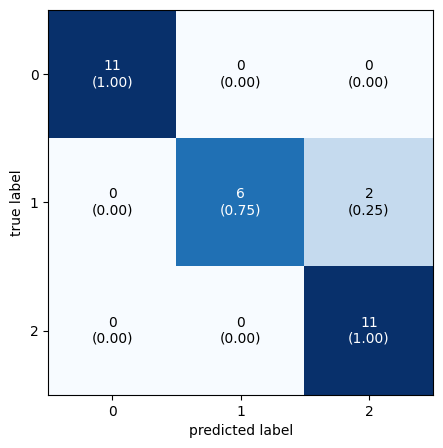

In [50]:
plot_confusion_matrix(conf_mat=cm,figsize=(5,5),show_normed=True)
plt.show()

In [54]:
"tp: ",cm[0,0]


('tp: ', 11)

In [55]:
"tn: ",cm[1,1]+cm[2,2]

('tn: ', 17)

In [57]:
"fp: ",cm[0,1]+cm[0,2]

('fp: ', 0)

In [58]:
"fn: ",cm[1,0]+cm[2,0]

('fn: ', 0)

In [65]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [67]:
precision_score(y_test,y_pred,average="macro")

0.9487179487179488

In [69]:
acc= accuracy_score(y_test,y_pred)
acc

0.9333333333333333

In [70]:
error_rate=1-acc
error_rate

0.06666666666666665

In [73]:
recall_score(y_test,y_pred,average="macro")


0.9166666666666666